In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Veri dosyasını yükleme
from google.colab import files
uploaded = files.upload()  # Dosyanı Google Colab'e yükle

# CSV dosyasını okuma
data = pd.read_csv('updated_dailystep_data.csv')

# İlk birkaç satırı görme
print(data.head())

# Veri seti hakkında özet bilgi
print(data.info())

# Eksik verileri kontrol etme
print(data.isnull().sum())


Saving updated_dailystep_data.csv to updated_dailystep_data (1).csv
         Date  Number of Steps  Distance (km)  Calories (kcal)  \
0  2024-10-01           3525.0            3.5            140.0   
1  2024-10-02           7825.0            5.5            140.0   
2  2024-10-03           5482.0            2.0            281.0   
3  2024-10-04           7107.0            5.6            294.0   
4  2024-10-05           5903.0            3.7            172.0   

   Active Time (min)  Floor Climbing  Target (%)  Rest Time (min)  \
0               19.0               5        44.0           1421.0   
1               26.0               9        98.0           1414.0   
2               53.0               8        69.0           1387.0   
3               42.0              10        89.0           1398.0   
4               35.0               4        74.0           1405.0   

  Exercise Type  Weight (kg)  
0       Running         53.2  
1       Running         53.8  
2       Walking         53.

In [ ]:
# Sadece sayısal sütunları seç
numeric_data = data.select_dtypes(include=[np.number])

# Ortalama (Mean)
mean_values = numeric_data.mean()
print("Mean Values:\n", mean_values)

# Standart Sapma (Standard Deviation)
std_values = numeric_data.std()
print("\nStandard Deviation:\n", std_values)

# Medyan (Median)
median_values = numeric_data.median()
print("\nMedian Values:\n", median_values)

# Minimum Değerler
min_values = numeric_data.min()
print("\nMinimum Values:\n", min_values)

# Maksimum Değerler
max_values = numeric_data.max()
print("\nMaximum Values:\n", max_values)

# Varyans (Variance)
variance_values = numeric_data.var()
print("\nVariance:\n", variance_values)

# Özet İstatistikler
print("\nSummary Statistics:\n", numeric_data.describe())


Mean Values:
 Number of Steps      5302.266667
Distance (km)           3.794444
Calories (kcal)       202.575556
Active Time (min)      42.937778
Floor Climbing          7.066667
Target (%)             66.285556
Rest Time (min)      1397.062222
Weight (kg)            53.338889
dtype: float64

Standard Deviation:
 Number of Steps      1778.547222
Distance (km)           1.114497
Calories (kcal)        69.781446
Active Time (min)      17.403135
Floor Climbing          2.759254
Target (%)             22.220021
Rest Time (min)        17.403135
Weight (kg)             0.483595
dtype: float64

Median Values:
 Number of Steps      5516.0
Distance (km)           3.8
Calories (kcal)       199.0
Active Time (min)      41.9
Floor Climbing          7.0
Target (%)             69.1
Rest Time (min)      1398.1
Weight (kg)            53.4
dtype: float64

Minimum Values:
 Number of Steps      2061.0
Distance (km)           1.7
Calories (kcal)        85.0
Active Time (min)      15.0
Floor Climbing      

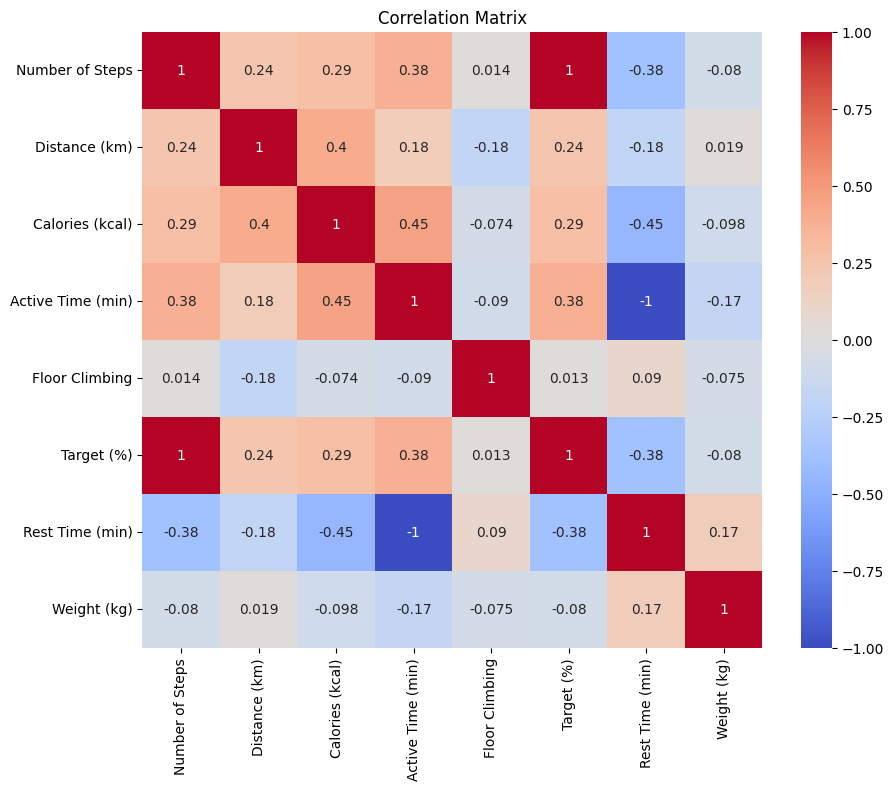

In [ ]:
# Sadece sayısal sütunları seç
numeric_data = data.select_dtypes(include=[np.number])

# Korelasyon analizi
correlations = numeric_data.corr()

# Korelasyon matrisini görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


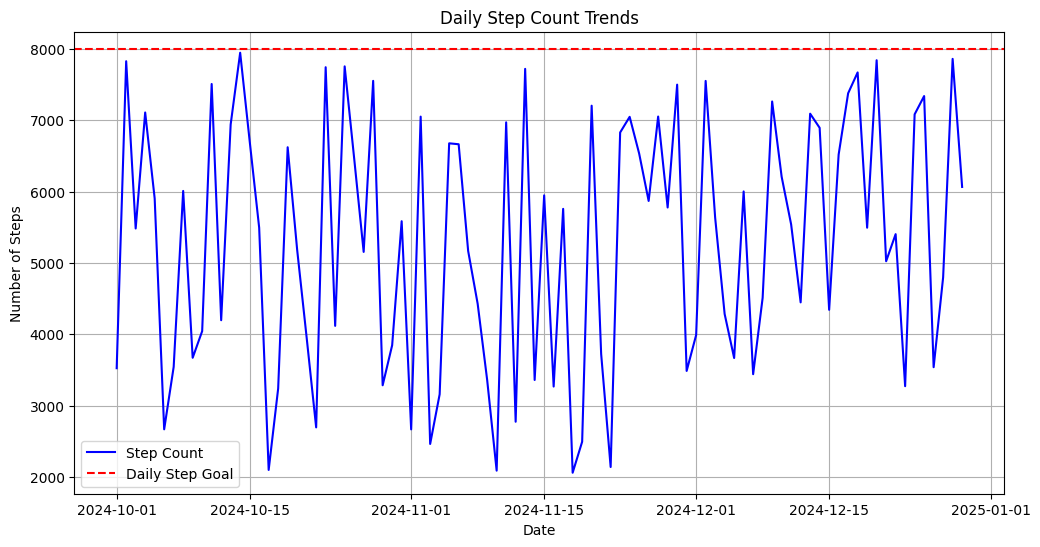

In [ ]:
# Zaman serisi analizi için tarih sütununu datetime formatına dönüştür
data['Date'] = pd.to_datetime(data['Date'])

# Günlük adım sayısı trendi
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Number of Steps'], label='Step Count', color='blue')
plt.axhline(y=8000, color='red', linestyle='--', label='Daily Step Goal')
plt.title('Daily Step Count Trends')
plt.xlabel('Date')
plt.ylabel('Number of Steps')
plt.legend()
plt.grid()
plt.show()


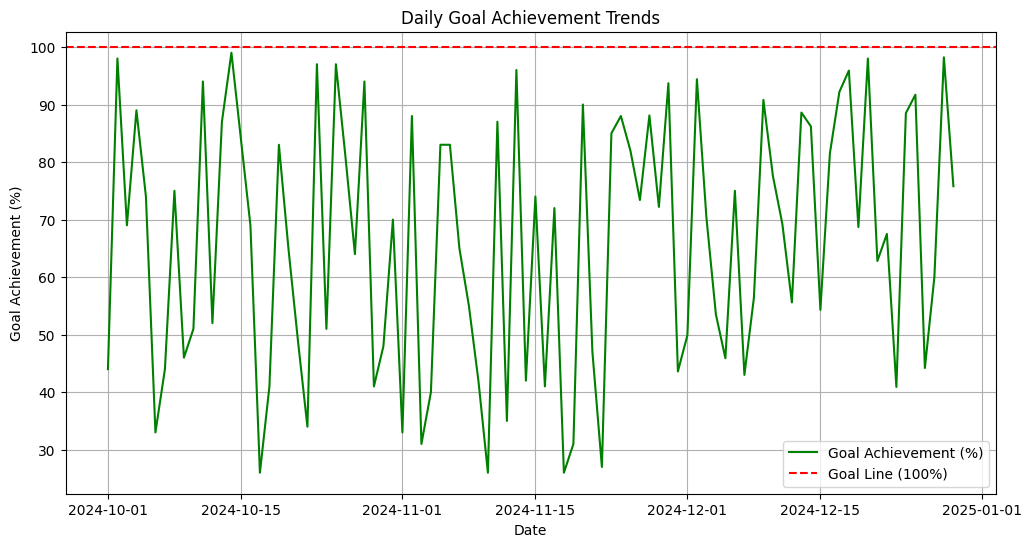

In [ ]:
# Hedef başarı oranının trendi
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Target (%)', data=data, label='Goal Achievement (%)', color='green')
plt.axhline(y=100, color='red', linestyle='--', label='Goal Line (100%)')
plt.title('Daily Goal Achievement Trends')
plt.xlabel('Date')
plt.ylabel('Goal Achievement (%)')
plt.legend()
plt.grid()
plt.show()


<ipython-input-11-23cd06abebaa>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Exercise Type', data=data, palette='pastel')


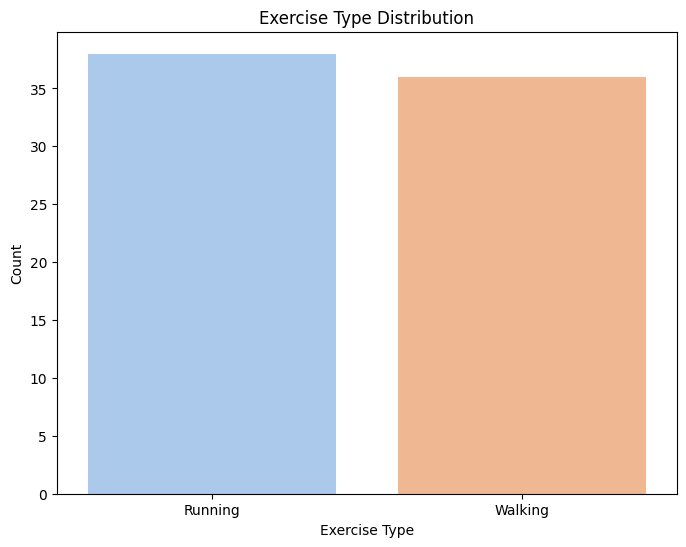

  Exercise Type  Number of Steps  Calories (kcal)
0       Running      4948.236842       197.305263
1       Walking      5723.694444       204.227778


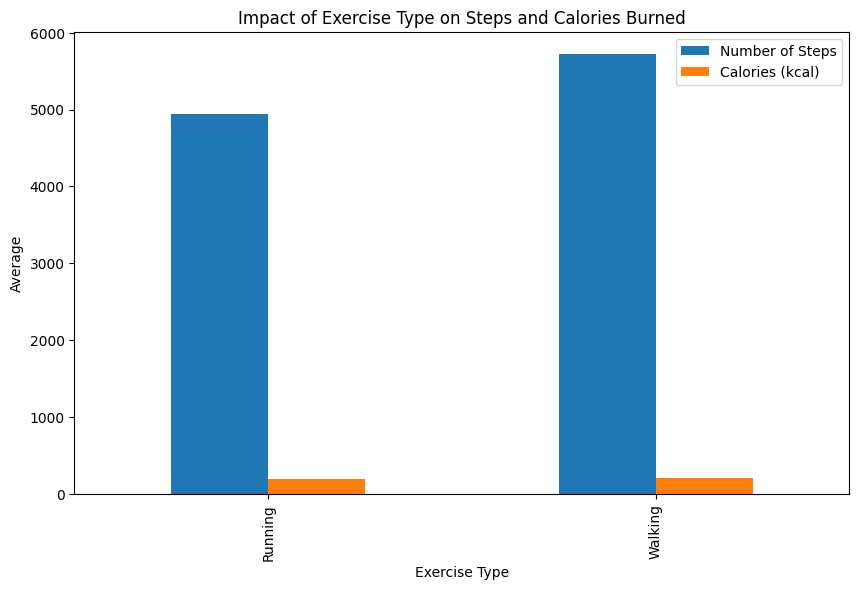

In [ ]:
# Egzersiz türlerinin dağılımı
plt.figure(figsize=(8, 6))
sns.countplot(x='Exercise Type', data=data, palette='pastel')
plt.title('Exercise Type Distribution')
plt.xlabel('Exercise Type')
plt.ylabel('Count')
plt.show()

# Egzersiz türlerine göre adım sayısı ve kalori analizi
exercise_impact = data.groupby('Exercise Type').agg({
    'Number of Steps': 'mean',
    'Calories (kcal)': 'mean'
}).reset_index()

print(exercise_impact)

# Görselleştirme
exercise_impact.plot(x='Exercise Type', y=['Number of Steps', 'Calories (kcal)'], kind='bar', figsize=(10, 6))
plt.title('Impact of Exercise Type on Steps and Calories Burned')
plt.ylabel('Average')
plt.show()


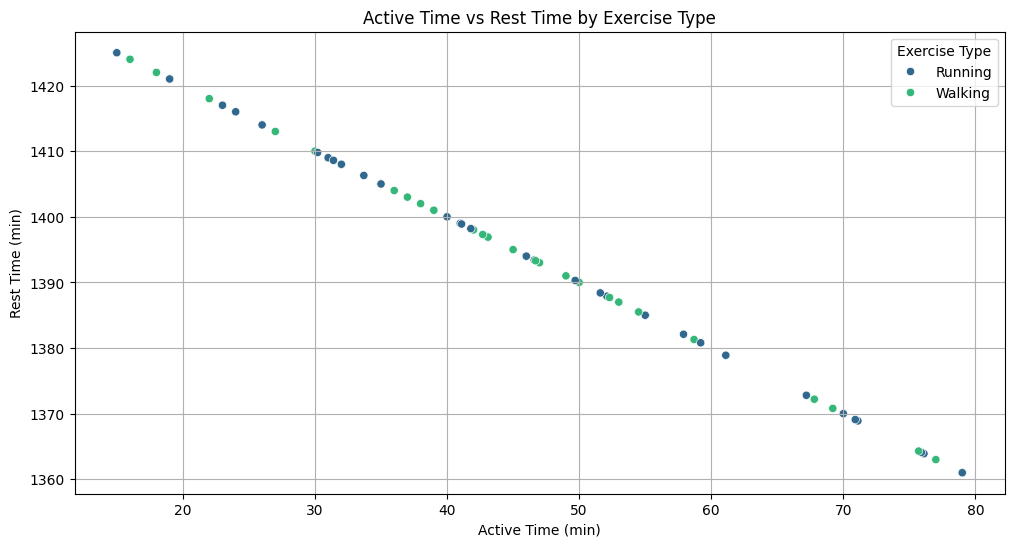

In [ ]:
# Dinlenme ve aktif zaman karşılaştırması
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Active Time (min)', y='Rest Time (min)', data=data, hue='Exercise Type', palette='viridis')
plt.title('Active Time vs Rest Time by Exercise Type')
plt.xlabel('Active Time (min)')
plt.ylabel('Rest Time (min)')
plt.grid()
plt.show()


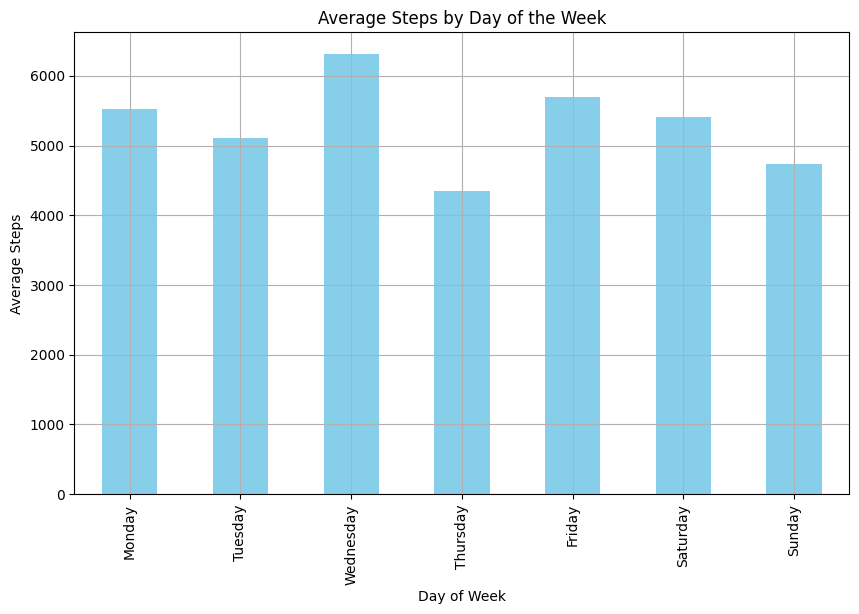

In [ ]:
# Haftanın günlerini eklemek için tarih sütununu datetime formatında kullan
data['Day of Week'] = data['Date'].dt.day_name()

# Günlere göre ortalama adım sayısı
day_steps = data.groupby('Day of Week')['Number of Steps'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

plt.figure(figsize=(10, 6))
day_steps.plot(kind='bar', color='skyblue')
plt.title('Average Steps by Day of the Week')
plt.ylabel('Average Steps')
plt.xlabel('Day of Week')
plt.grid()
plt.show()


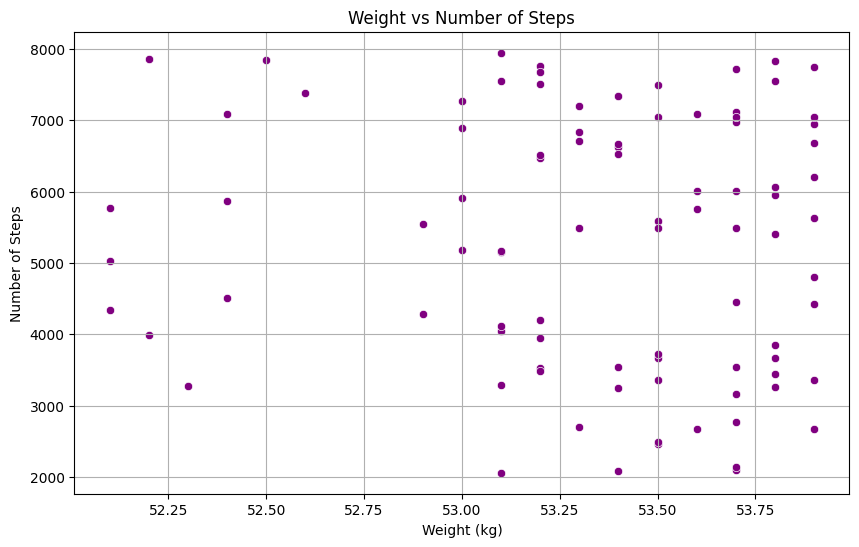

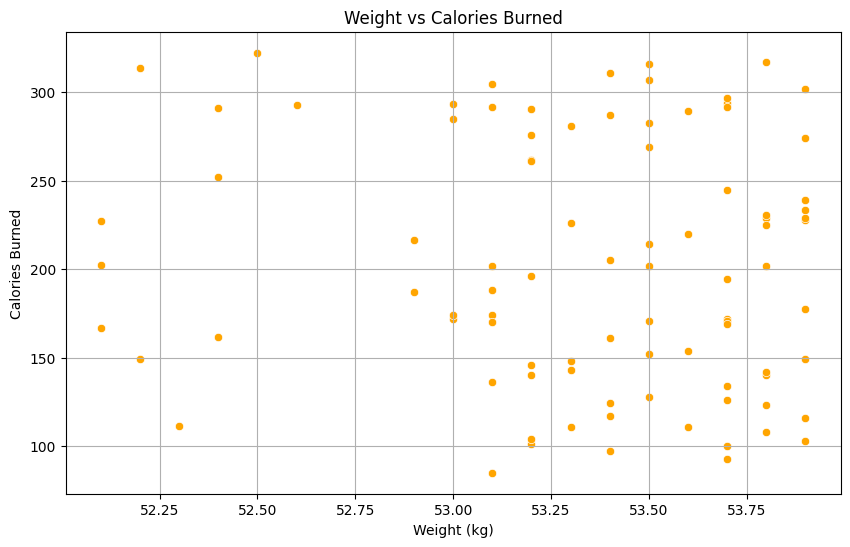

In [ ]:
# Kilo ile adım sayısı ilişkisi
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Weight (kg)', y='Number of Steps', data=data, color='purple')
plt.title('Weight vs Number of Steps')
plt.xlabel('Weight (kg)')
plt.ylabel('Number of Steps')
plt.grid()
plt.show()

# Kilo ile kalori yakımı ilişkisi
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Weight (kg)', y='Calories (kcal)', data=data, color='orange')
plt.title('Weight vs Calories Burned')
plt.xlabel('Weight (kg)')
plt.ylabel('Calories Burned')
plt.grid()
plt.show()


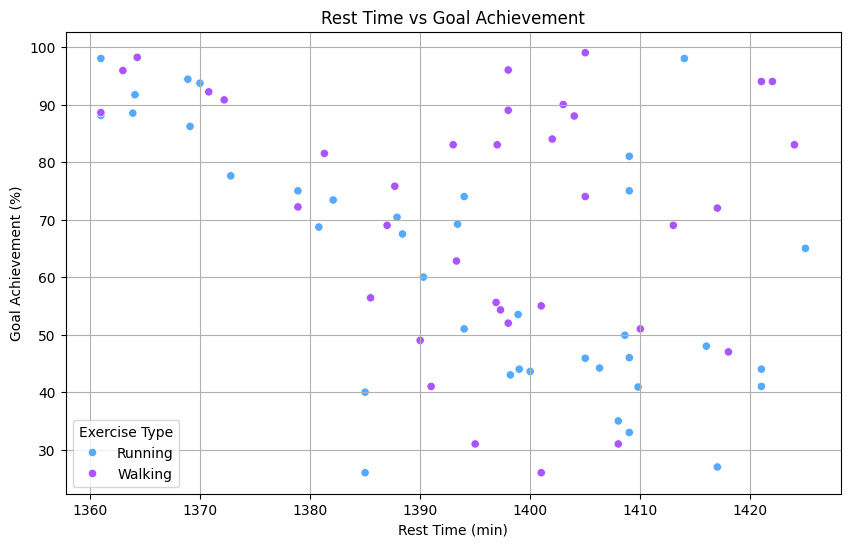

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rest Time (min)', y='Target (%)', data=data, hue='Exercise Type', palette='cool')
plt.title('Rest Time vs Goal Achievement')
plt.xlabel('Rest Time (min)')
plt.ylabel('Goal Achievement (%)')
plt.legend(title='Exercise Type')
plt.grid()
plt.show()


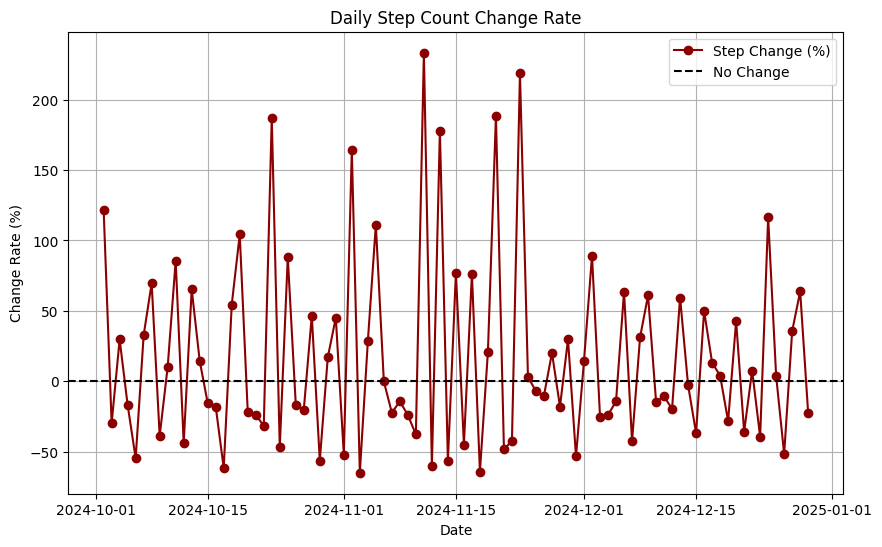

In [ ]:
# Günlük değişim oranı hesaplama
data['Step Change (%)'] = data['Number of Steps'].pct_change() * 100

# Zaman içinde değişim oranı trendi
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Step Change (%)'], marker='o', label='Step Change (%)', color='darkred')
plt.axhline(y=0, color='black', linestyle='--', label='No Change')
plt.title('Daily Step Count Change Rate')
plt.xlabel('Date')
plt.ylabel('Change Rate (%)')
plt.legend()
plt.grid()
plt.show()


<ipython-input-17-e3ae0f53128f>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Activity Level', data=data, palette='Set2')


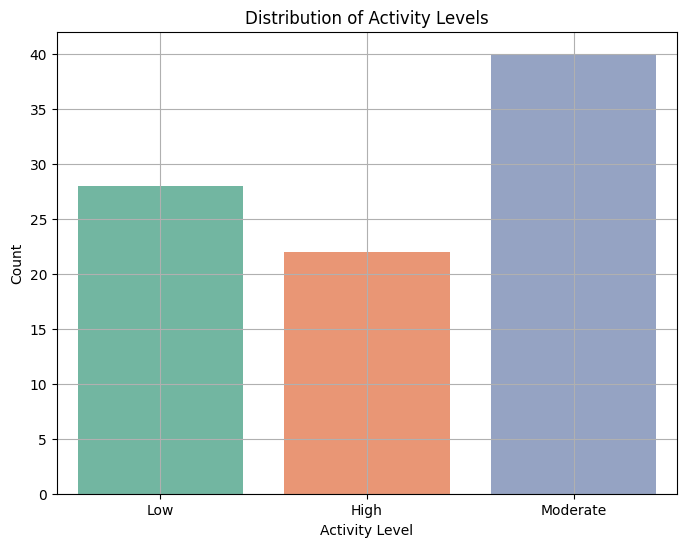

In [ ]:
# Aktivite kategorileri oluşturma
conditions = [
    (data['Number of Steps'] < 4000),
    (data['Number of Steps'] >= 4000) & (data['Number of Steps'] < 7000),
    (data['Number of Steps'] >= 7000)
]
choices = ['Low', 'Moderate', 'High']
data['Activity Level'] = np.select(conditions, choices, default='Moderate')

# Aktivite yoğunluğunun dağılımı
plt.figure(figsize=(8, 6))
sns.countplot(x='Activity Level', data=data, palette='Set2')
plt.title('Distribution of Activity Levels')
plt.xlabel('Activity Level')
plt.ylabel('Count')
plt.grid()
plt.show()


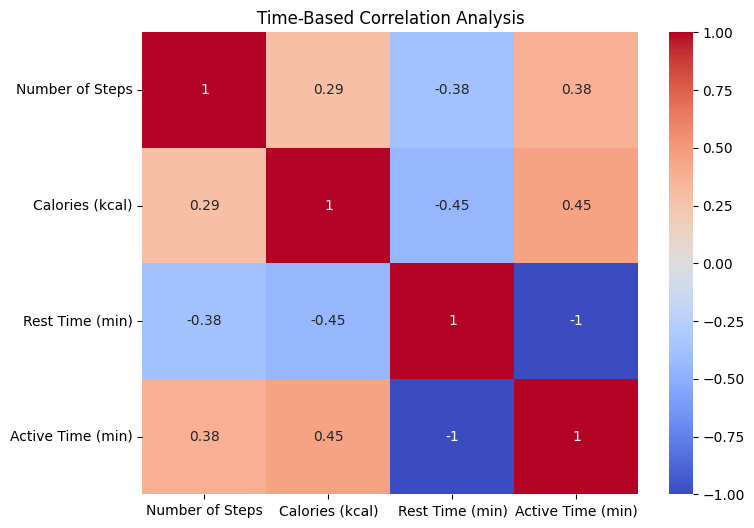

In [ ]:
# Zaman serisi korelasyon analizi
time_based_corr = data[['Number of Steps', 'Calories (kcal)', 'Rest Time (min)', 'Active Time (min)']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(time_based_corr, annot=True, cmap='coolwarm')
plt.title('Time-Based Correlation Analysis')
plt.show()


In [ ]:
# Gerekli kütüphaneleri yükle
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

# Veri setini yükle
data = pd.read_csv('updated_dailystep_data.csv')  # Dosya adını doğru belirt
data['Exercise Type'] = data['Exercise Type'].fillna('None')  # Boş egzersiz türlerini doldur

# Tarih sütununu datetime formatına dönüştür
data['Date'] = pd.to_datetime(data['Date'])


In [ ]:
#Hipotezlerin Tanımlanması:
#Null Hypothesis (H0): Günlük aktif zaman ile yakılan kalori arasında anlamlı bir ilişki yoktur.
#Alternative Hypothesis (H1): Günlük aktif zaman arttıkça yakılan kalori anlamlı şekilde artar.

In [ ]:
from scipy.stats import linregress

# Aktif zaman (x) ve yakılan kalori (y) verilerini seç
active_time = data['Active Time (min)']
calories_burned = data['Calories (kcal)']

# Doğrusal regresyon analizi
slope, intercept, r_value, p_value, std_err = linregress(active_time, calories_burned)

# Sonuçları yazdır
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-Value: {p_value}")

# Sonuç değerlendirme
alpha = 0.05  # %5 anlamlılık seviyesi
if p_value < alpha:
    print("Sonuç: H0 reddedilir. Aktif zaman ile yakılan kalori arasında anlamlı bir ilişki vardır.")
else:
    print("Sonuç: H0 reddedilemez. Aktif zaman ile yakılan kalori arasında anlamlı bir ilişki yoktur.")


Slope: 1.8070509305255902
Intercept: 124.98480426752121
R-squared: 0.2031027728768272
P-Value: 8.299695363343303e-06
Sonuç: H0 reddedilir. Aktif zaman ile yakılan kalori arasında anlamlı bir ilişki vardır.


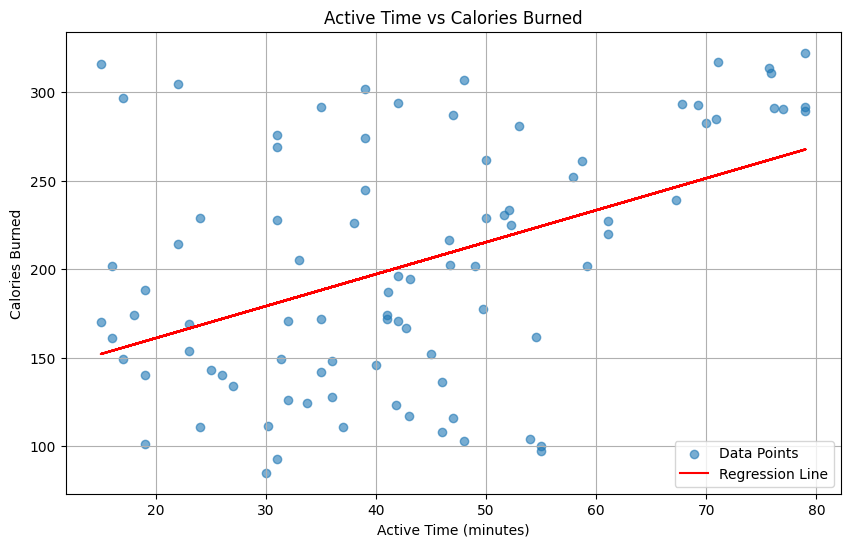

In [ ]:
import matplotlib.pyplot as plt

# Veri noktalarını ve regresyon doğrusunu çizin
plt.figure(figsize=(10, 6))
plt.scatter(active_time, calories_burned, label='Data Points', alpha=0.6)
plt.plot(active_time, slope * active_time + intercept, color='red', label='Regression Line')
plt.title('Active Time vs Calories Burned')
plt.xlabel('Active Time (minutes)')
plt.ylabel('Calories Burned')
plt.legend()
plt.grid()
plt.show()
